# Environment

In [33]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scanpy as sc
from datetime import datetime

# Set working directory
# work_dir = '/home/michal.kubacki/Githubs/GeneScore/trimmed_GRN_derivation'
work_dir = 'D:/Github/GeneScore/trimmed_GRN_derivation'
# work_dir = '/mnt/d/Github/GeneScore/trimmed_GRN_derivation'
os.chdir(work_dir)

# Load environment variables from .env file
from dotenv import load_dotenv

# Explicitly specify the path to the .env file
env_path = os.path.join(work_dir, '.env')
load_dotenv(env_path)

# Get environment variables with error handling
project_functions_path = os.getenv('PROJECT_FUNCTIONS_PATH')
if not project_functions_path:
    raise ValueError("PROJECT_FUNCTIONS_PATH environment variable not found in .env file")

print(f"Using PROJECT_FUNCTIONS_PATH: {project_functions_path}")
sys.path.insert(0, project_functions_path)

# Try to import from project_functions
try:
    from grn_helpers import *
    from results_analysis import *
except ImportError:
    print("Warning: Could not import from project_functions path, trying absolute path")
    # Try absolute import path as fallback
    # sys.path.insert(0, '/home/michal.kubacki/Githubs/GeneScore/project_functions')
    sys.path.insert(0, 'D:/Github/GeneScore/project_functions')
    # sys.path.insert(0,'/mnt/d/Github/GeneScore/project_functions')
    from grn_helpers import *
    from results_analysis import *

Using PROJECT_FUNCTIONS_PATH: D:/Github/GeneScore/project_functions


In [34]:
# Configuration parameters
neurons_set = "L2-3_CUX2"  # Options: "all_ex", "all_ex_all_ages", "L2-3_CUX2"

# Get base path from environment variables with error handling
root_dir = os.getenv('BASE_PATH')
if not root_dir:
    raise ValueError("BASE_PATH environment variable not found in .env file")

In [35]:
# Set up directories
output_dir, input_dir, root_dir, tmp_dir, in_dir_from_scenic = set_custom_folders(root_dir, neurons_set)

# Plot settings
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams["savefig.dpi"] = 300

root_dir: D:/Github/GeneScore/herring_minimal
out_dir: D:/Github/GeneScore/herring_minimal\L2-3_CUX2\celloracle
in_dir: D:/Github/GeneScore/herring_minimal\data
tmp_dir: D:/Github/GeneScore/herring_minimal\celloracle\tmp


In [36]:
# Load the the scores
print("Loading simulation scores...")
sim_scores_path = os.path.join(output_dir, 'scores_sim_all_new.csv')
sim_scores = pd.read_csv(sim_scores_path)
print(f"Loaded simulation scores with shape: {sim_scores.shape}")

print("\nLoading GRN scores...")
grn_scores_path = os.path.join(output_dir, 'scores_grn_all_from_comb_run_new.csv')
grn_scores = pd.read_csv(grn_scores_path)
print(f"Loaded GRN scores with shape: {grn_scores.shape}")

Loading simulation scores...
Loaded simulation scores with shape: (10000, 6)

Loading GRN scores...
Loaded GRN scores with shape: (105, 10)


# Simulation results

In [37]:
# Get unique perturbed genes and cell types
perturbed_genes = sim_scores['goi'].unique()
print(f"Unique perturbed genes: {len(perturbed_genes)}")
print(perturbed_genes)

cell_types = sim_scores['cell_type'].unique()
print(f"\nUnique cell types: {len(cell_types)}")
print(cell_types)

Unique perturbed genes: 10
['GLI1' 'GLI2' 'GLI3' 'GLI4' 'RARA' 'RARB' 'RARG' 'RXRA' 'RXRB' 'RXRG']

Unique cell types: 1
['L2-3_CUX2']


In [38]:
# Display the first few rows of each dataset
print("\nSimulation scores sample:")
sim_scores.rename(columns={'gene': 'target_gene'}, inplace=True)
sim_scores['score'] = sim_scores['log_fold_change']
sim_scores.sort_values(by='score', key=lambda x: abs(x), ascending=False, inplace=True)
# print(sim_scores.head())
sim_scores.head()


Simulation scores sample:


,local_cell_type,target_gene,log_fold_change,goi,fold_change,cell_type,score
5000,L2-3_CUX2,RARB,-0.363783,RARB,0.777124,L2-3_CUX2,-0.363783
5001,L2-3_CUX2,PTPRZ1,0.314226,RARB,1.243344,L2-3_CUX2,0.314226
5002,L2-3_CUX2,KIF26B,0.242189,RARB,1.182786,L2-3_CUX2,0.242189
5003,L2-3_CUX2,PRKD1,0.175128,RARB,1.129065,L2-3_CUX2,0.175128
5004,L2-3_CUX2,FGFR2,0.174960,RARB,1.128933,L2-3_CUX2,0.174960


## GLI1

In [39]:
sim_scores[sim_scores['goi'] == 'GLI1'].head()

,local_cell_type,target_gene,log_fold_change,goi,fold_change,cell_type,score
0,L2-3_CUX2,RERGL,0.061705,GLI1,1.043698,L2-3_CUX2,0.061705
1,L2-3_CUX2,GLIS3,0.060490,GLI1,1.042820,L2-3_CUX2,0.060490
2,L2-3_CUX2,PALMD,0.058527,GLI1,1.041402,L2-3_CUX2,0.058527
3,L2-3_CUX2,PCDH11X,0.057259,GLI1,1.040487,L2-3_CUX2,0.057259
4,L2-3_CUX2,GRM3,0.056429,GLI1,1.039889,L2-3_CUX2,0.056429


## RARA

In [40]:
sim_scores[sim_scores['goi'] == 'RARA'].head()

,local_cell_type,target_gene,log_fold_change,goi,fold_change,cell_type,score
4000,L2-3_CUX2,KIAA1211,0.106934,RARA,1.076937,L2-3_CUX2,0.106934
4001,L2-3_CUX2,RBM25,0.098057,RARA,1.070331,L2-3_CUX2,0.098057
4002,L2-3_CUX2,HSPA4L,-0.093325,RARA,0.937360,L2-3_CUX2,-0.093325
4003,L2-3_CUX2,FGD4,0.064384,RARA,1.045638,L2-3_CUX2,0.064384
4004,L2-3_CUX2,RERGL,0.061705,RARA,1.043698,L2-3_CUX2,0.061705


## Simulation scores statistics

In [41]:
# Get basic statistics for the datasets
print("\nSimulation scores statistics:")
print(sim_scores.describe())


Simulation scores statistics:
       log_fold_change   fold_change         score
count     10000.000000  10000.000000  10000.000000
mean          0.024150      1.016930      0.024150
std           0.014218      0.010021      0.014218
min          -0.363783      0.777124     -0.363783
25%           0.013560      1.009444      0.013560
50%           0.022726      1.015878      0.022726
75%           0.033144      1.023240      0.033144
max           0.314226      1.243344      0.314226


# GRN results

In [42]:
# Get unique perturbed genes and cell types
perturbed_genes = grn_scores['goi'].unique()
print(f"Unique perturbed genes: {len(perturbed_genes)}")
print(perturbed_genes)

cell_types = grn_scores['cell_type'].unique()
print(f"\nUnique cell types: {len(cell_types)}")
print(cell_types)

Unique perturbed genes: 10
['GLI1' 'GLI2' 'GLI3' 'GLI4' 'RARA' 'RARB' 'RARG' 'RXRA' 'RXRB' 'RXRG']

Unique cell types: 1
['L2-3_CUX2']


In [43]:
for goi in perturbed_genes:
    goi_scores = grn_scores[grn_scores['goi'] == goi]
    print(f"\nScores for GOI: {goi} --> len {len(goi_scores)}")


Scores for GOI: GLI1 --> len 2

Scores for GOI: GLI2 --> len 22

Scores for GOI: GLI3 --> len 17

Scores for GOI: GLI4 --> len 2

Scores for GOI: RARA --> len 13

Scores for GOI: RARB --> len 8

Scores for GOI: RARG --> len 4

Scores for GOI: RXRA --> len 22

Scores for GOI: RXRB --> len 7

Scores for GOI: RXRG --> len 8


In [44]:
print("\nGRN scores sample:")
grn_scores.rename(columns={'target': 'target_gene'}, inplace=True)
grn_scores.drop(columns=['score'], inplace=True)
grn_scores.rename(columns={'coef_mean': 'score'}, inplace=True)
grn_scores.sort_values(by='score', key=lambda x: abs(x), ascending=False, inplace=True)
# print(grn_scores.head())
grn_scores.head()


GRN scores sample:


,source,target_gene,score,coef_abs,p,X.logp,celltype,goi,cell_type
97,RXRG,FTH1,0.190063,0.190063,6.825054e-22,21.165894,L2-3_CUX2,RXRG,L2-3_CUX2
90,RXRB,CDH18,0.141307,0.141307,2.616919e-14,13.582210,L2-3_CUX2,RXRB,L2-3_CUX2
2,GLI2,NCAM2,-0.138708,0.138708,3.833435e-10,9.416412,L2-3_CUX2,GLI2,L2-3_CUX2
43,RARA,ABHD3,0.131842,0.131842,7.029356e-18,17.153084,L2-3_CUX2,RARA,L2-3_CUX2
44,RARA,KIAA1211,-0.128439,0.128439,2.687163e-12,11.570706,L2-3_CUX2,RARA,L2-3_CUX2


## GLI1

In [45]:
grn_scores[grn_scores['goi'] == 'GLI2'].head()

,source,target_gene,score,coef_abs,p,X.logp,celltype,goi,cell_type
2,GLI2,NCAM2,-0.138708,0.138708,3.833435e-10,9.416412,L2-3_CUX2,GLI2,L2-3_CUX2
3,GLI2,ASTN2,0.124540,0.124540,4.359878e-13,12.360526,L2-3_CUX2,GLI2,L2-3_CUX2
4,GLI2,SAMD3,-0.118111,0.118111,9.246042e-10,9.034044,L2-3_CUX2,GLI2,L2-3_CUX2
5,GLI2,ZNF804A,-0.115730,0.115730,1.615370e-14,13.791728,L2-3_CUX2,GLI2,L2-3_CUX2
6,GLI2,NRGN,-0.109330,0.109330,8.599263e-11,10.065539,L2-3_CUX2,GLI2,L2-3_CUX2


## RARA

In [46]:
grn_scores[grn_scores['goi'] == 'RARA'].head()

,source,target_gene,score,coef_abs,p,X.logp,celltype,goi,cell_type
43,RARA,ABHD3,0.131842,0.131842,7.029356e-18,17.153084,L2-3_CUX2,RARA,L2-3_CUX2
44,RARA,KIAA1211,-0.128439,0.128439,2.687163e-12,11.570706,L2-3_CUX2,RARA,L2-3_CUX2
45,RARA,C1QTNF4,0.096907,0.096907,3.056270e-13,12.514808,L2-3_CUX2,RARA,L2-3_CUX2
46,RARA,HSPA4L,0.080827,0.080827,2.773300e-14,13.557003,L2-3_CUX2,RARA,L2-3_CUX2
47,RARA,PRKD1,-0.078964,0.078964,7.426626e-14,13.129208,L2-3_CUX2,RARA,L2-3_CUX2


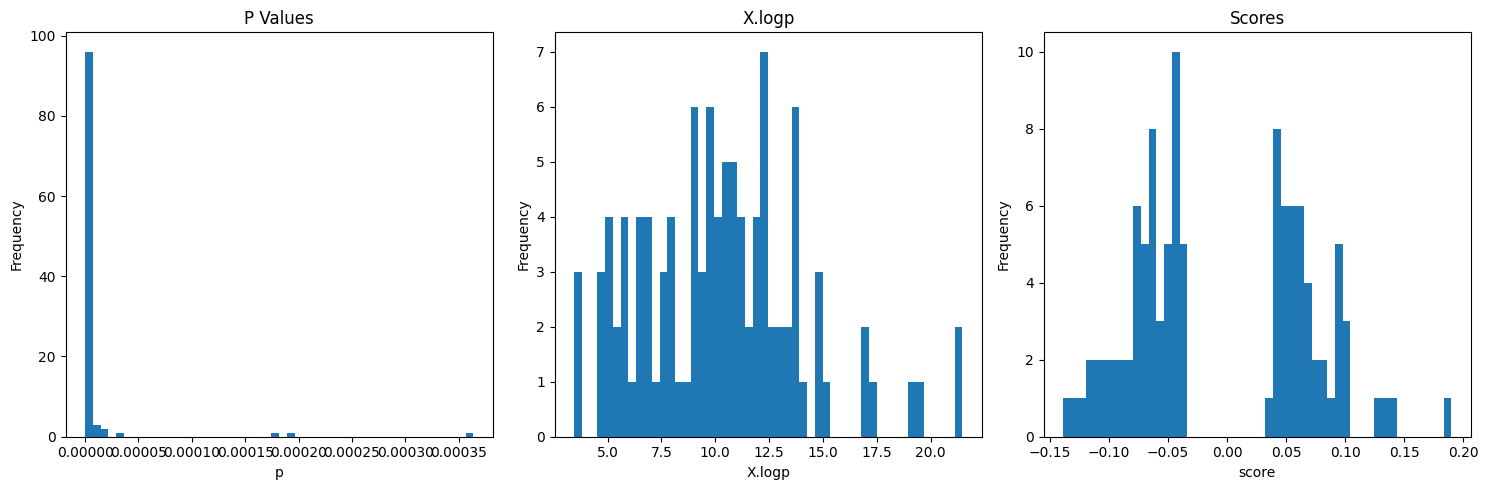

P-values range: Min: 0.000000 Max: 0.000364
Coefficient means range: Min: 3.439308 Max: 21.480076
Scores range: Min: -0.138708 Max: 0.190063


In [47]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].hist(grn_scores['p'], bins=50)
axes[0].set_title('P Values')
axes[0].set_xlabel('p')
axes[0].set_ylabel('Frequency')

axes[1].hist(grn_scores['X.logp'], bins=50)
axes[1].set_title('X.logp')
axes[1].set_xlabel('X.logp')
axes[1].set_ylabel('Frequency')

axes[2].hist(grn_scores['score'], bins=50)
axes[2].set_title('Scores')
axes[2].set_xlabel('score')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

print("P-values range:", f"Min: {min(grn_scores['p']):.6f}", f"Max: {max(grn_scores['p']):.6f}")
print("Coefficient means range:", f"Min: {min(grn_scores['X.logp']):.6f}", f"Max: {max(grn_scores['X.logp']):.6f}")
print("Scores range:", f"Min: {min(grn_scores['score']):.6f}", f"Max: {max(grn_scores['score']):.6f}")

In [48]:
print("\nGRN scores statistics:")
print(grn_scores.describe())


GRN scores statistics:
            score    coef_abs             p      X.logp
count  105.000000  105.000000  1.050000e+02  105.000000
mean    -0.005124    0.070218  8.094178e-06   10.229934
std      0.075742    0.028024  4.339090e-05    3.738464
min     -0.138708    0.037643  3.310728e-22    3.439308
25%     -0.066291    0.046998  4.359878e-13    7.501282
50%     -0.039114    0.063210  6.023010e-11   10.220186
75%      0.060151    0.083020  3.152960e-08   12.360526
max      0.190063    0.190063  3.636567e-04   21.480076


# Common analysis

Analysis for perturbation of gene: RARA

Simulation data shape: (1000, 7)
GRN data shape: (13, 9)

Top 10 affected genes by simulation scores:
       target_gene     score
4000      KIAA1211  0.106934
4001         RBM25  0.098057
4003          FGD4  0.064384
4004         RERGL  0.061705
4005         GLIS3  0.060490
4007         PALMD  0.058527
4008       PCDH11X  0.057259
4009          GRM3  0.056429
4010  RP11-33A14.1  0.056375
4011          PID1  0.055984


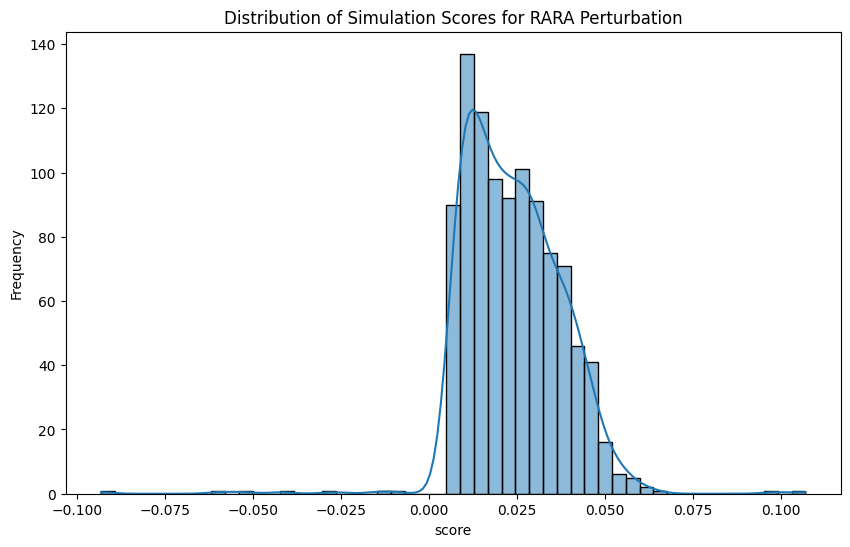


Top 10 affected genes by GRN scores:
   target_gene     score
43       ABHD3  0.131842
45     C1QTNF4  0.096907
46      HSPA4L  0.080827
48         MAK  0.076819
50        OXR1  0.071596
51    HSP90AA1  0.065213
52        NRGN  0.058480
53      DNAJB1  0.057066
55      PTPRZ1 -0.046451
54        FGD4 -0.051032


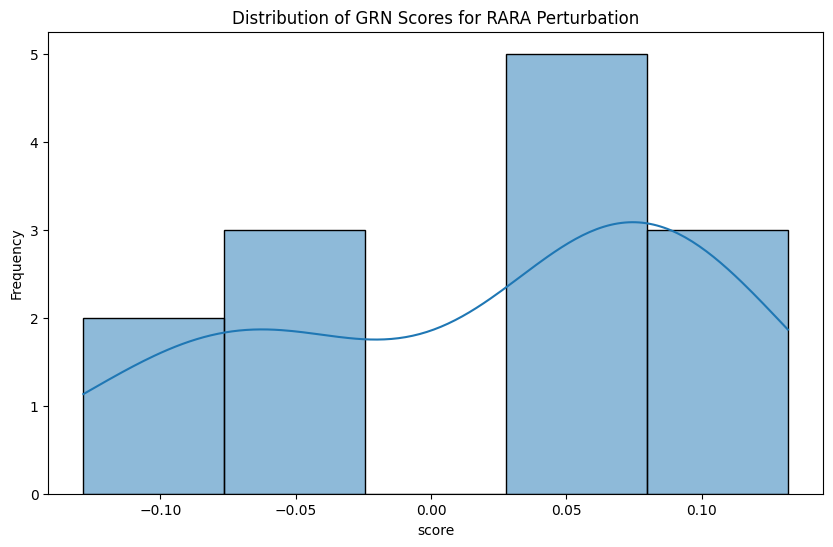

In [49]:
example_gene = 'RARA'
sim_data, grn_data = analyze_gene_perturbation(sim_scores, grn_scores, example_gene)

Analysis for perturbation of gene: RARA
Top 50 genes in simulation scores: 50
Top 50 genes in GRN scores: 13
Common genes: 4 (8.00%)
Common genes: ['FGD4', 'KIAA1211', 'PRKD1', 'RBM25']


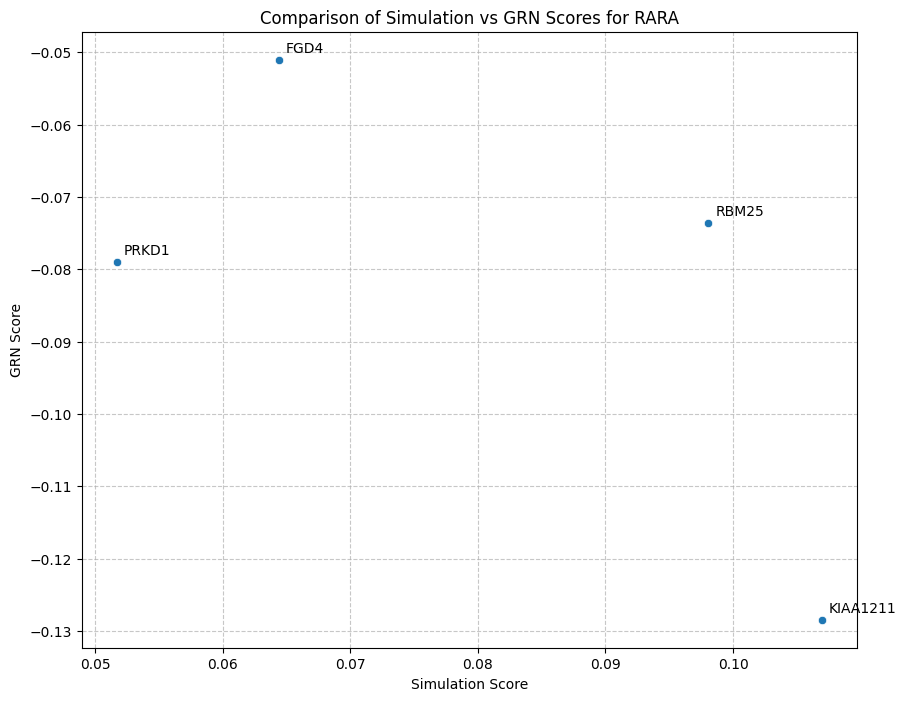

In [50]:
# Find common target genes
common_genes = find_common_targets(sim_scores, grn_scores, example_gene, top_n=50)

In [51]:
# Print execution time
start_time = datetime.now()
print(f"Script started at {start_time}")
end_time = datetime.now()
print(f"Script ended at {end_time}")
print(f"Total execution time: {end_time - start_time}")

Script started at 2025-06-03 07:32:16.288292
Script ended at 2025-06-03 07:32:16.289295
Total execution time: 0:00:00.001003
